In [1]:
import pandas as pd
data = pd.read_csv("data.csv", delimiter=";")

In [2]:
X = data.drop("Target", axis=1)
y = data["Target"]

In [13]:
one_hot_columns = [
    "Marital status",
    "Application mode",
    "Course",
    "Previous qualification (grade)",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
]

numeric_features = [col for col in X.columns if col not in one_hot_columns]

/home/david/miniforge3/envs/ds/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/david/miniforge3/envs/ds/lib/python3.13/site-packages/dython/nominal.py:963: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(filename)
/home/david/miniforge3/envs/ds/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


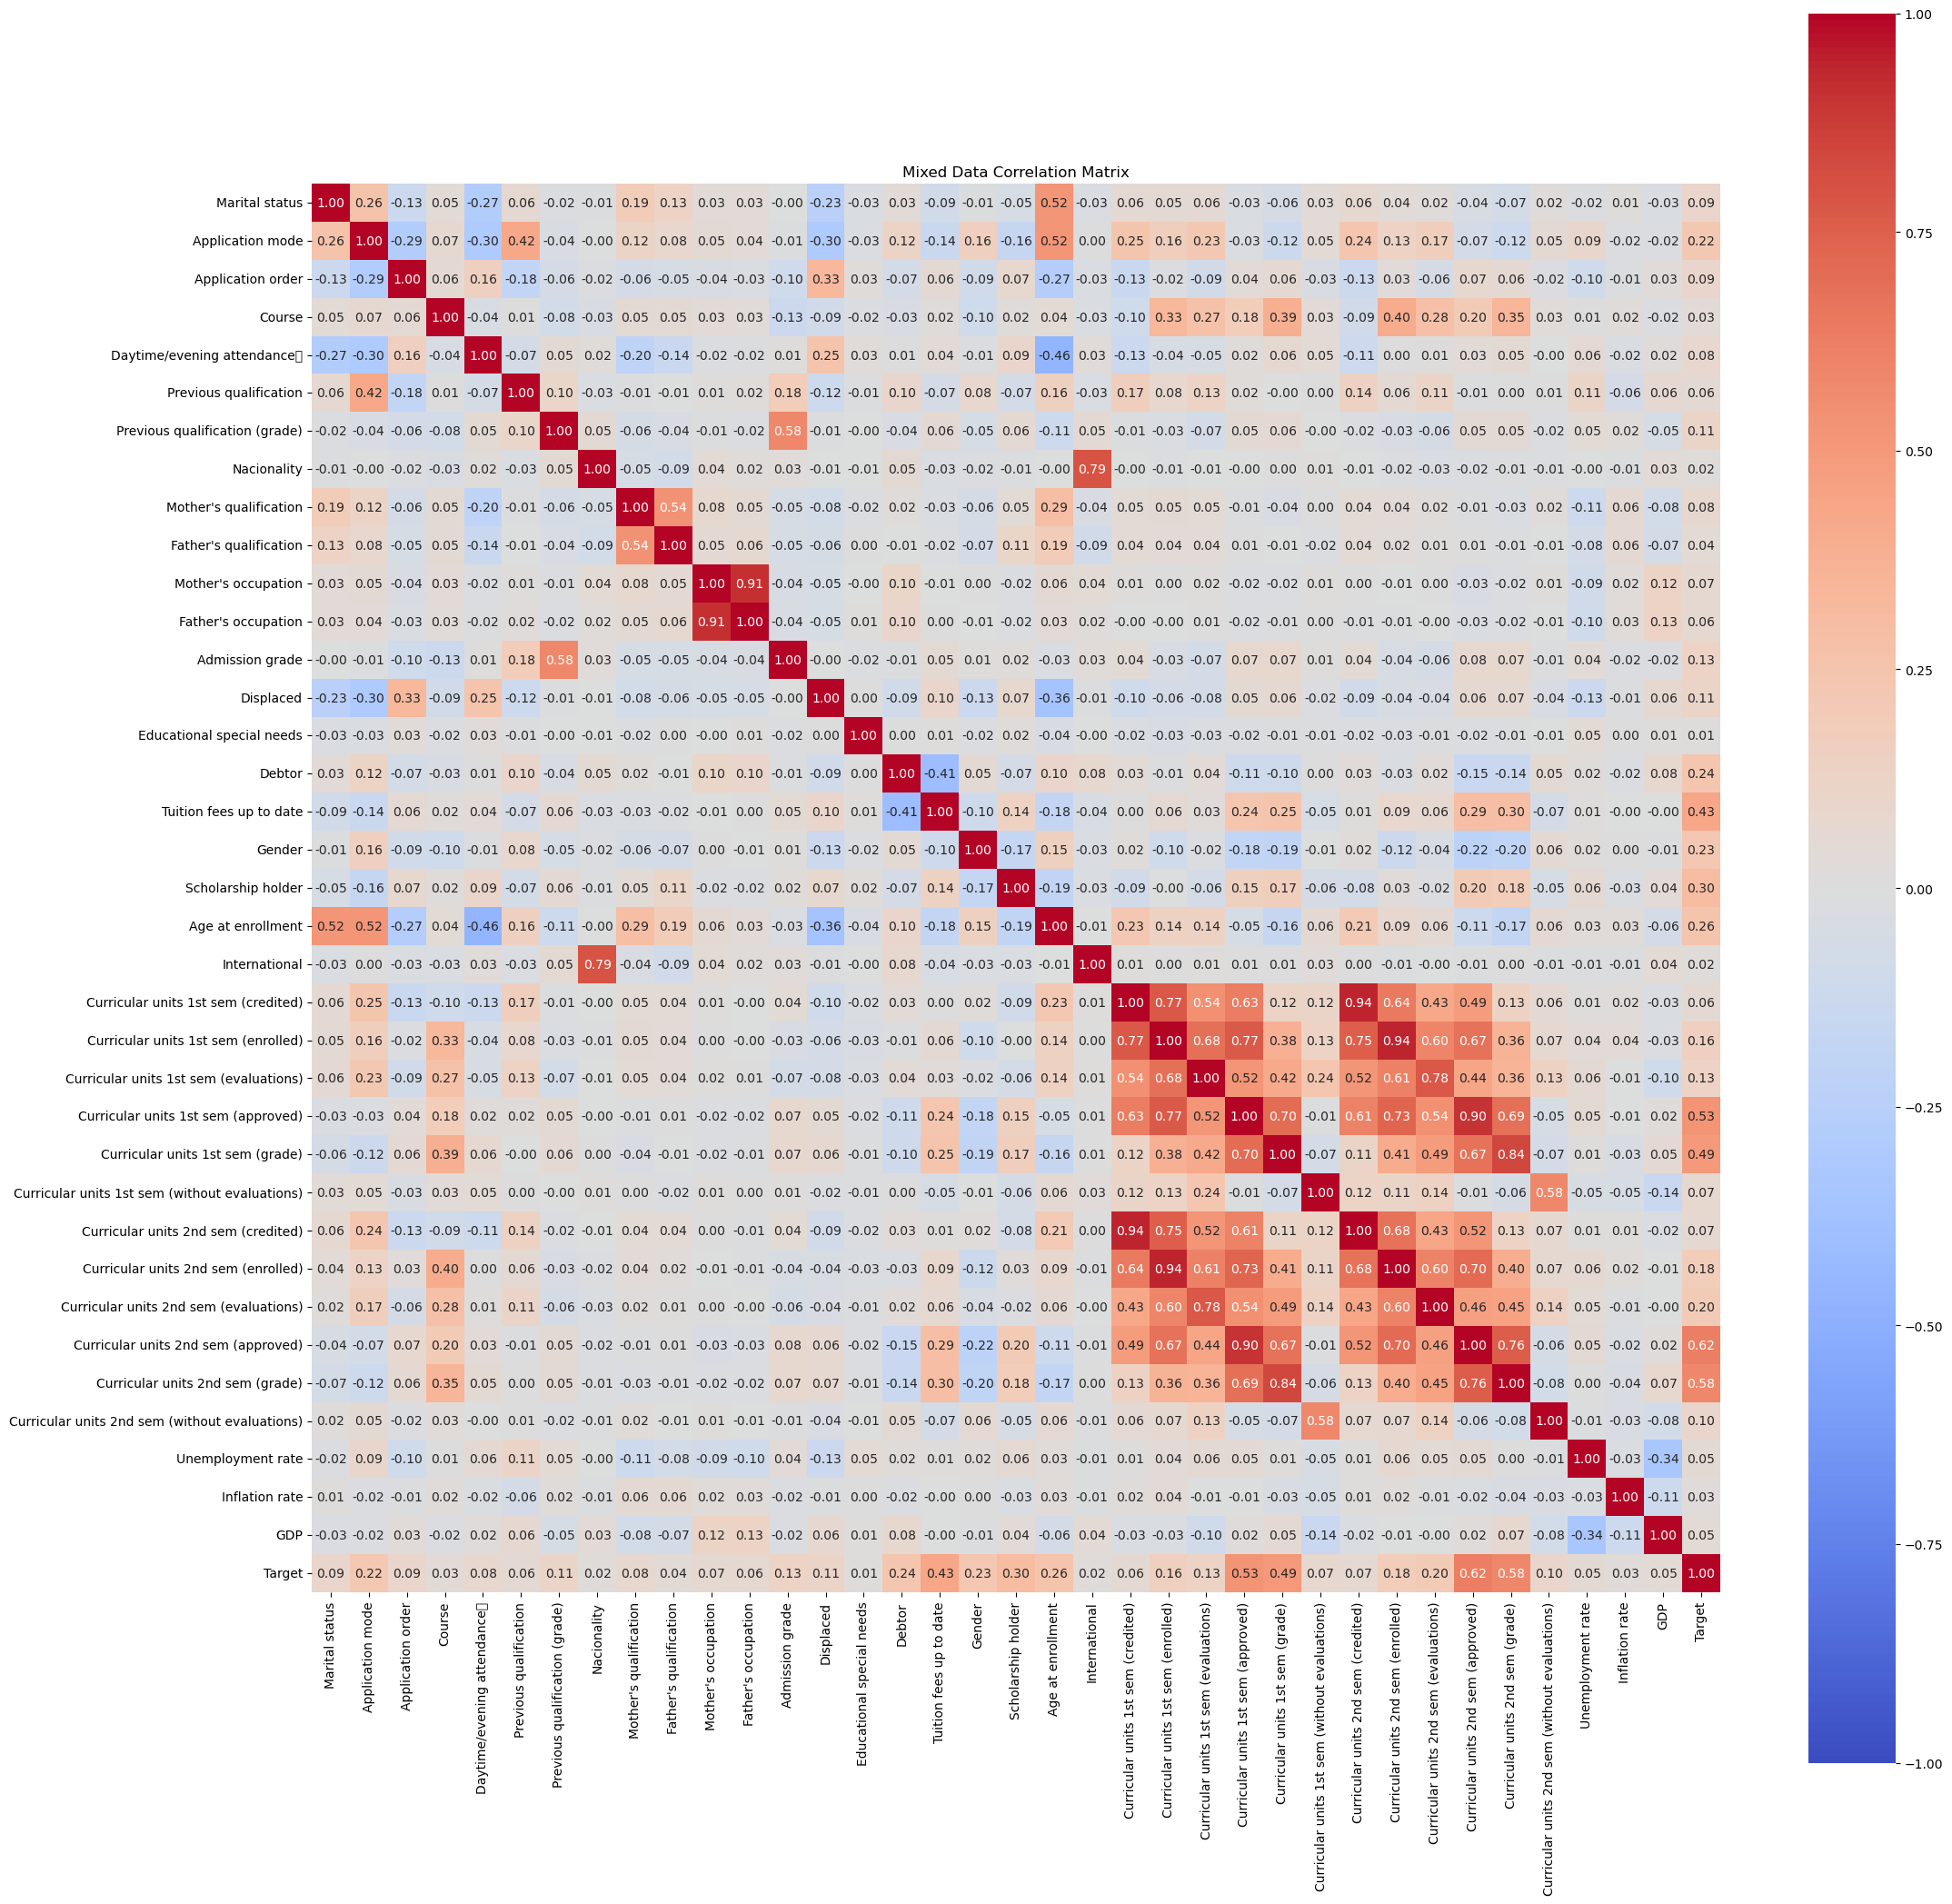

In [4]:
from dython.nominal import associations

# Load your dataset (replace with your data)

# Compute associations matrix (handles categorical and numerical variables)
assoc = associations(
    data, 
    filename='correlation_matrix.png', 
    figsize=(25, 25), 
    cmap='coolwarm', 
    title="Mixed Data Correlation Matrix"
)

/tmp/ipykernel_61028/2538089055.py:5: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/david/miniforge3/envs/ds/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


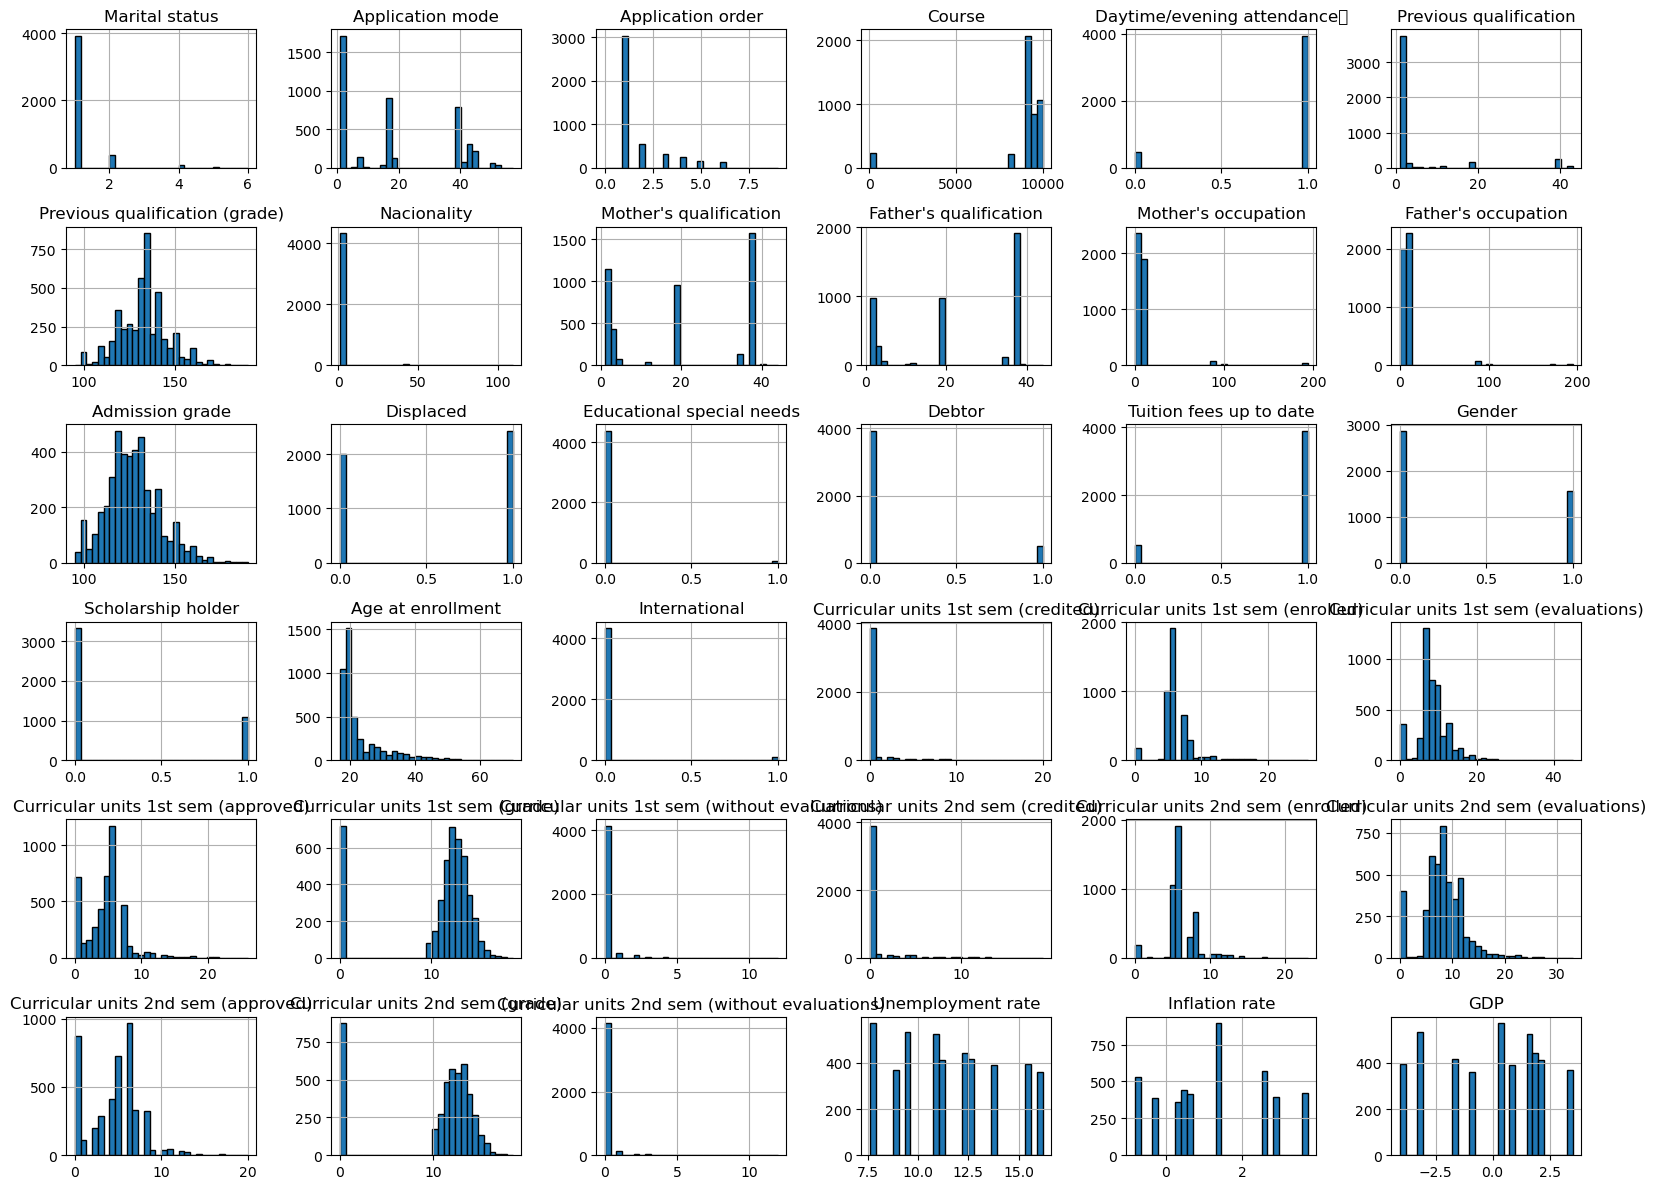

In [5]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
data.hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.tight_layout()
plt.show()

/tmp/ipykernel_61028/2917343522.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))
/home/david/miniforge3/envs/ds/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


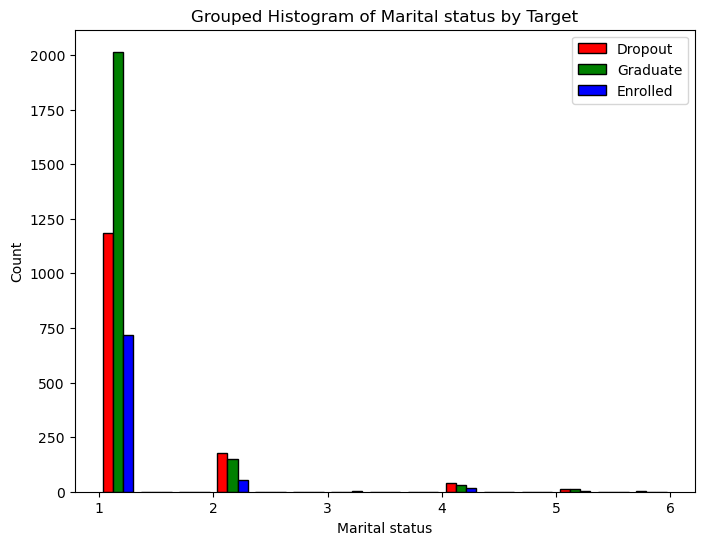

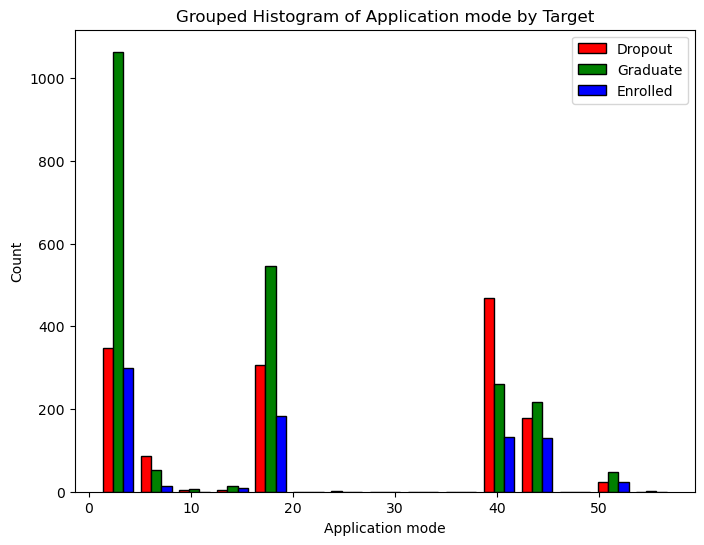

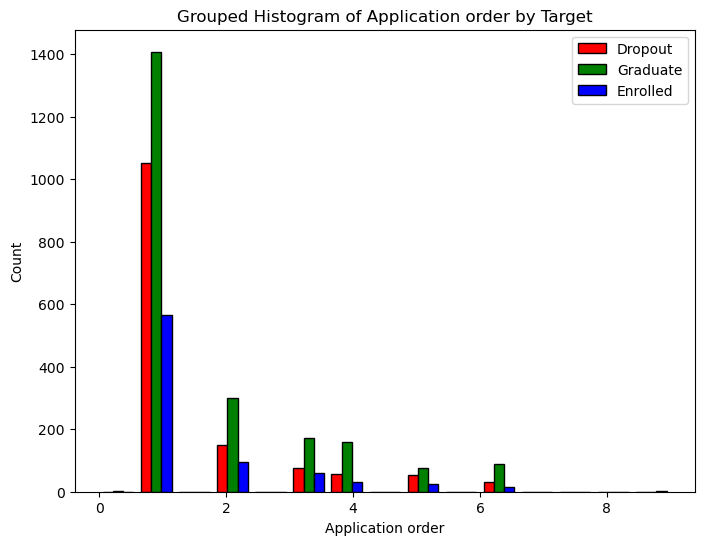

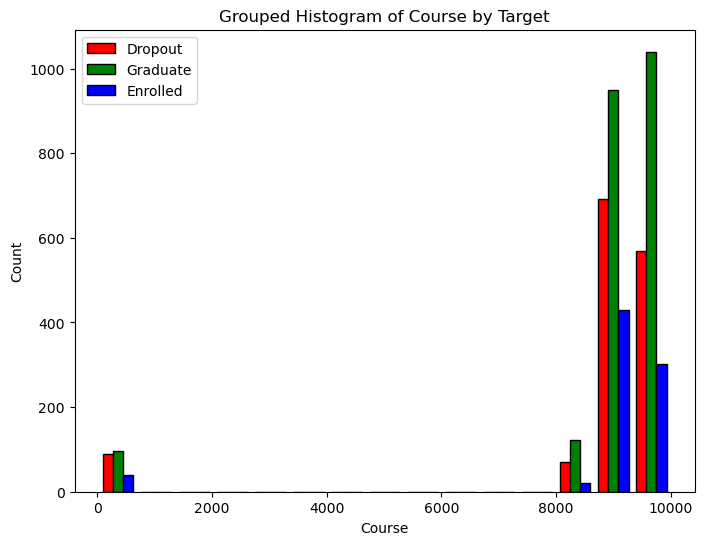

/home/david/miniforge3/envs/ds/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


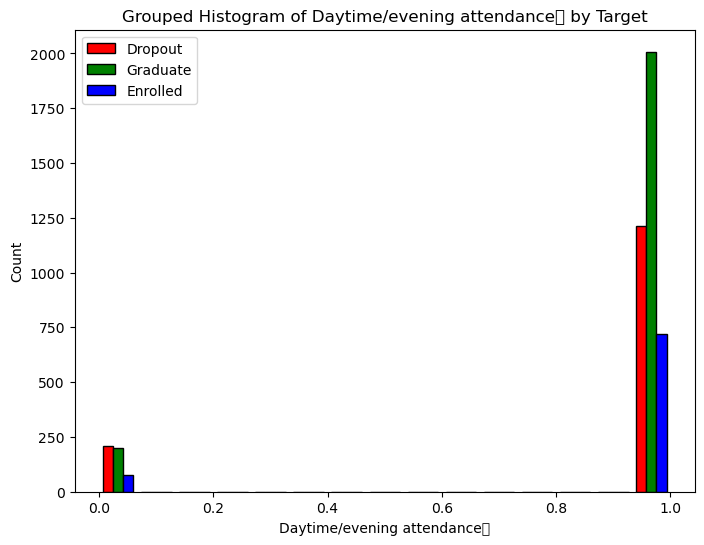

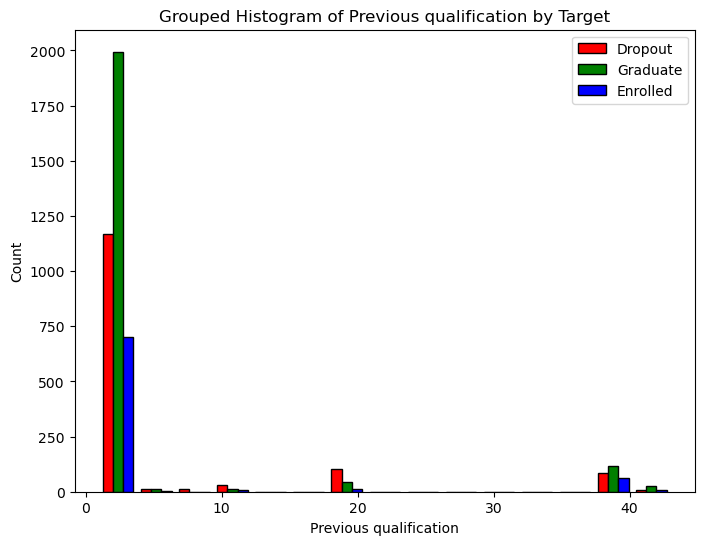

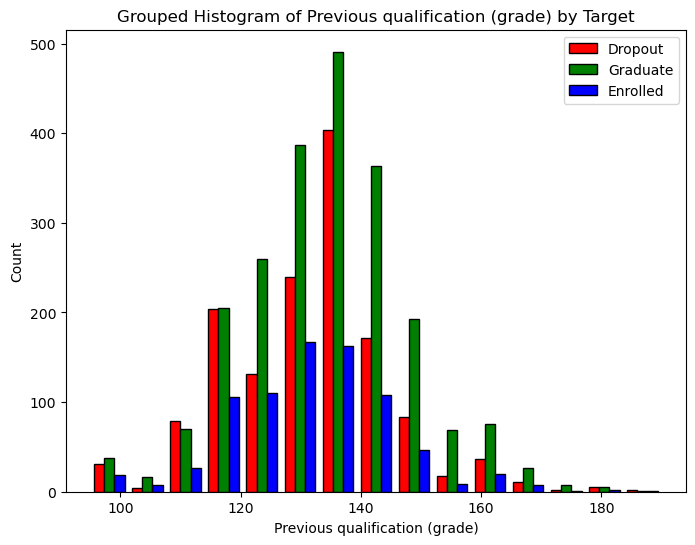

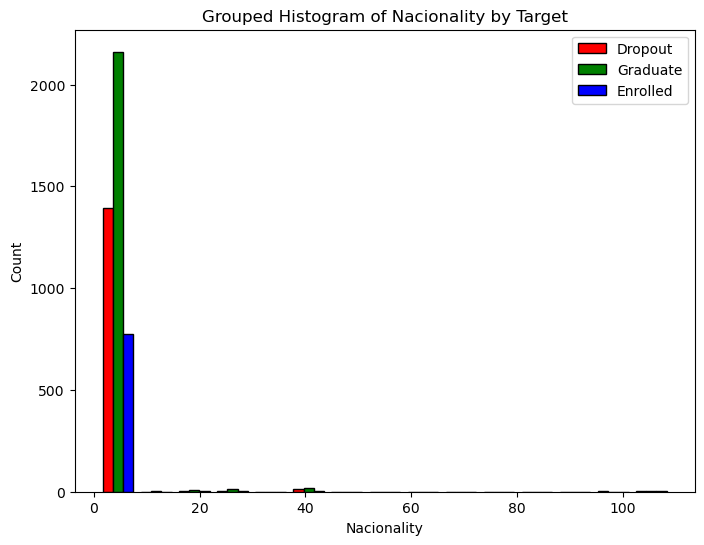

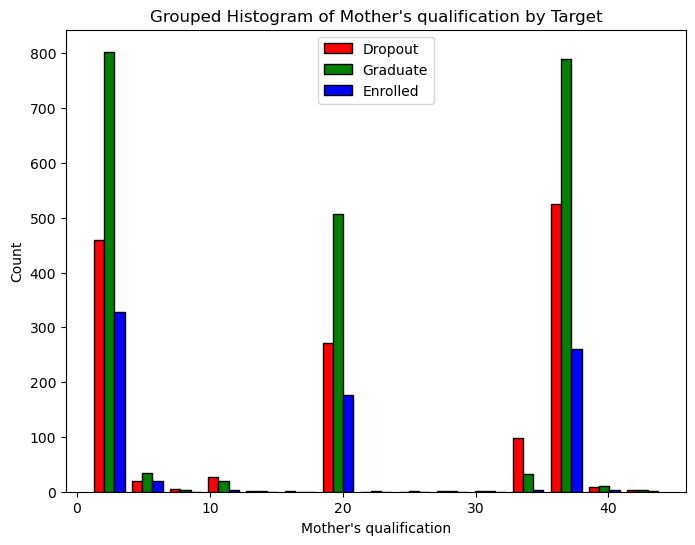

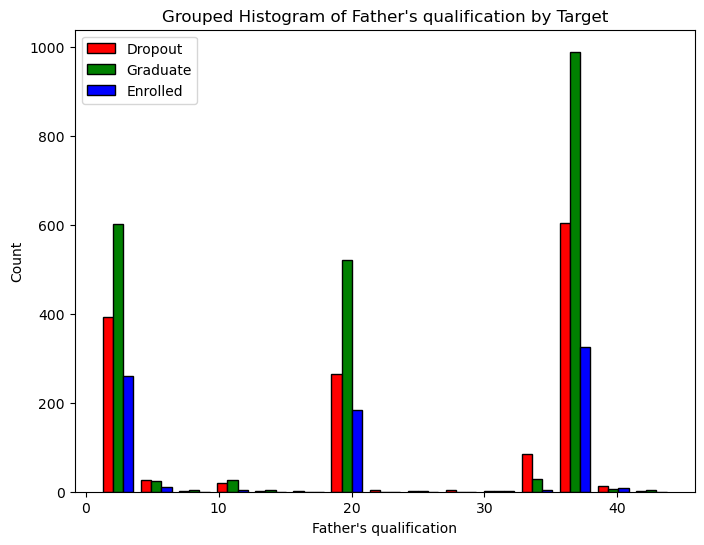

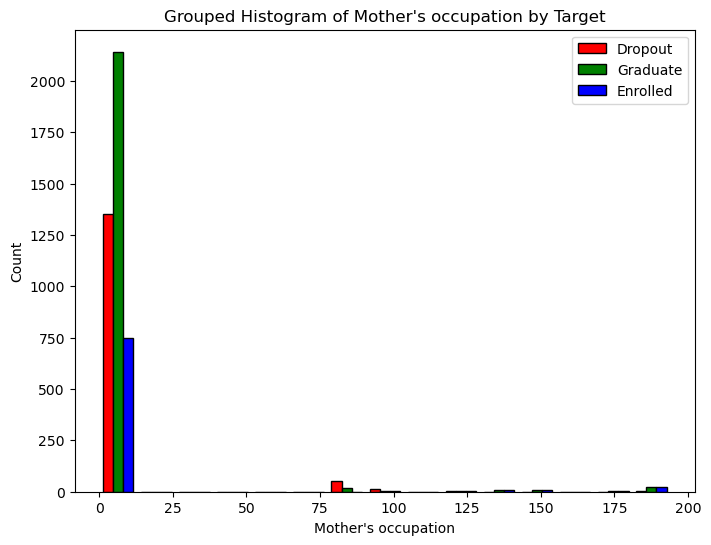

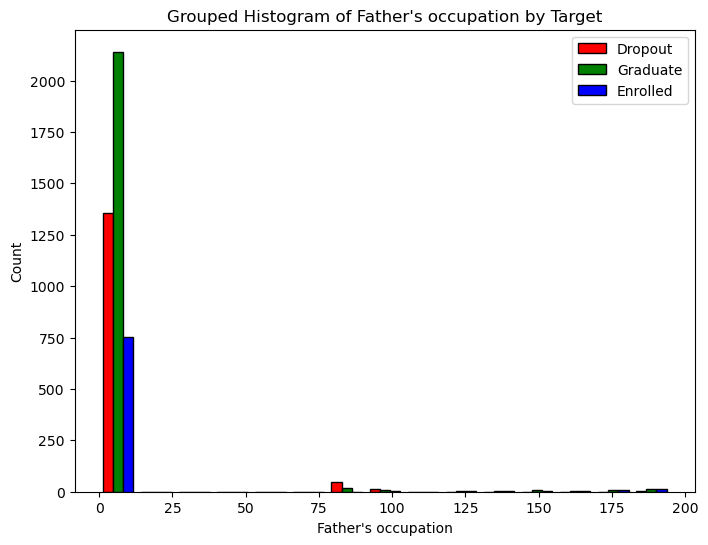

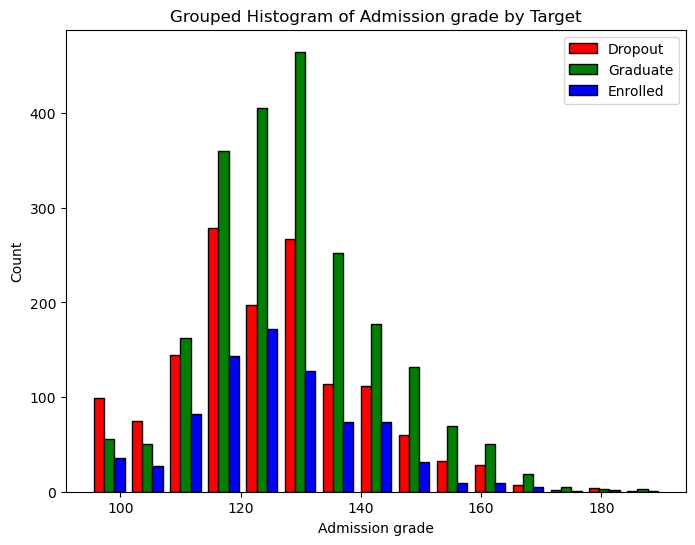

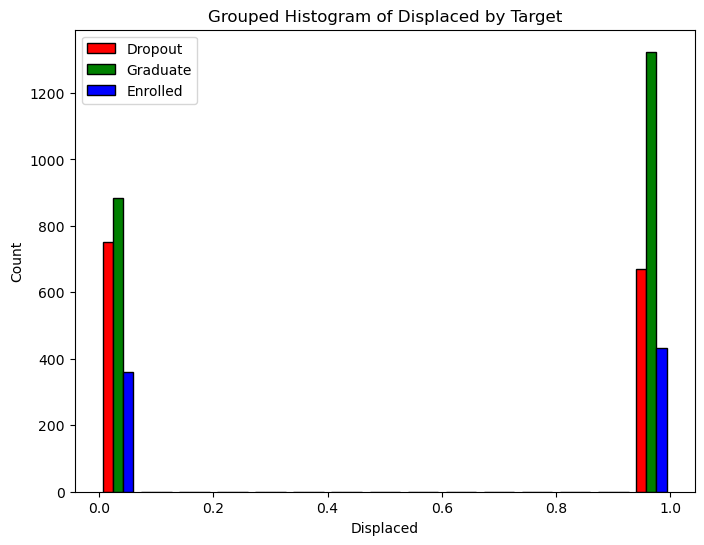

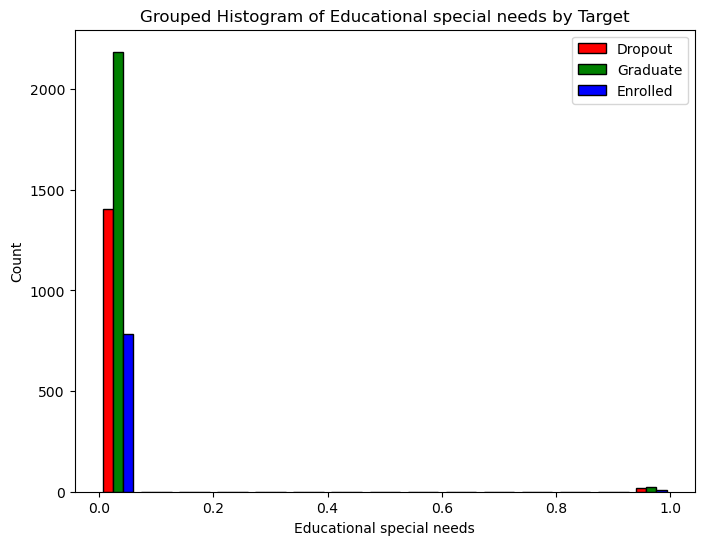

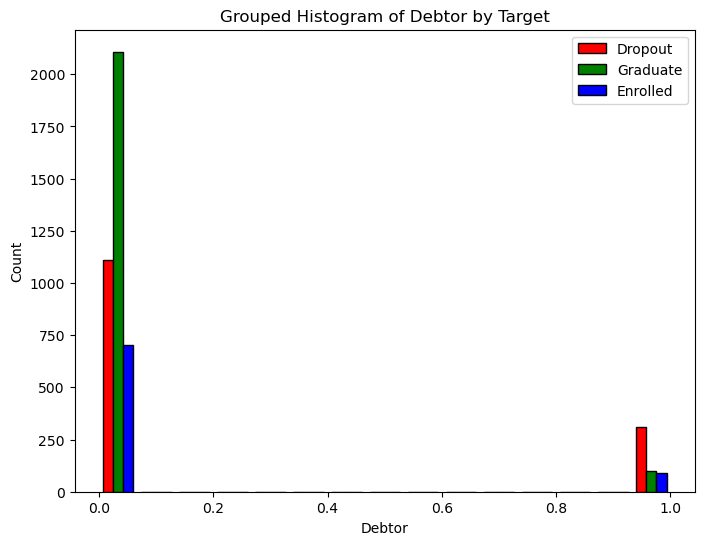

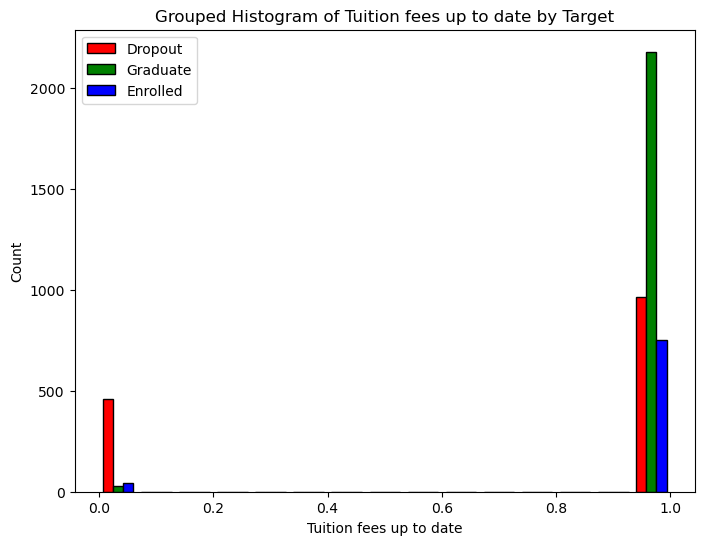

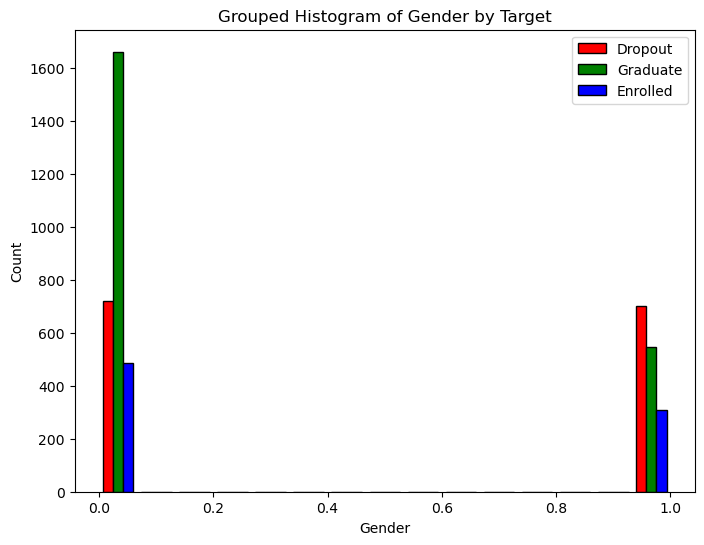

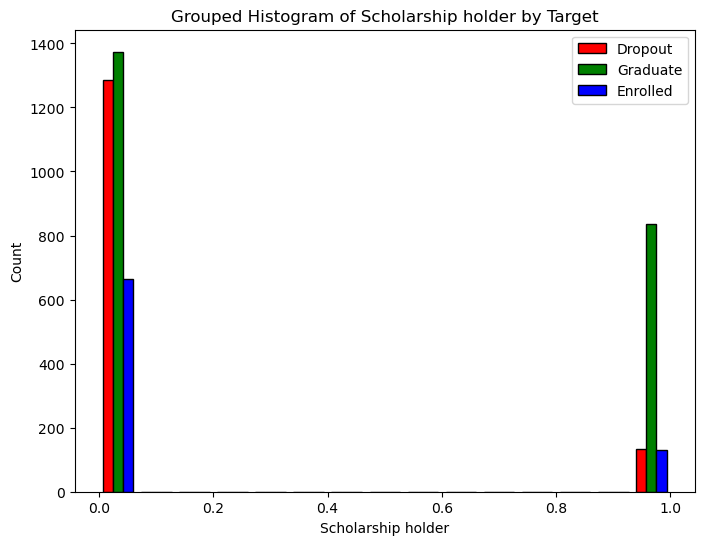

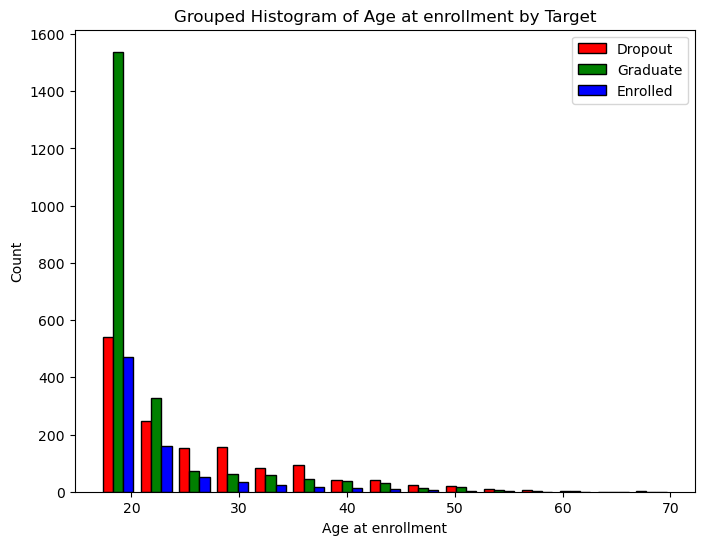

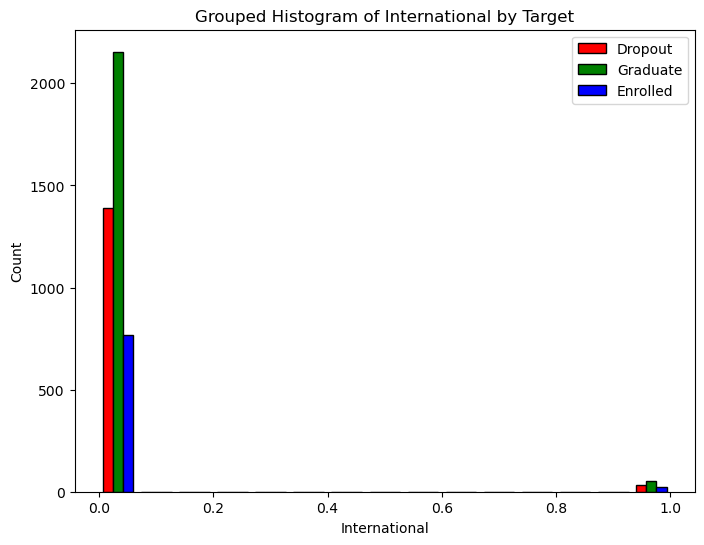

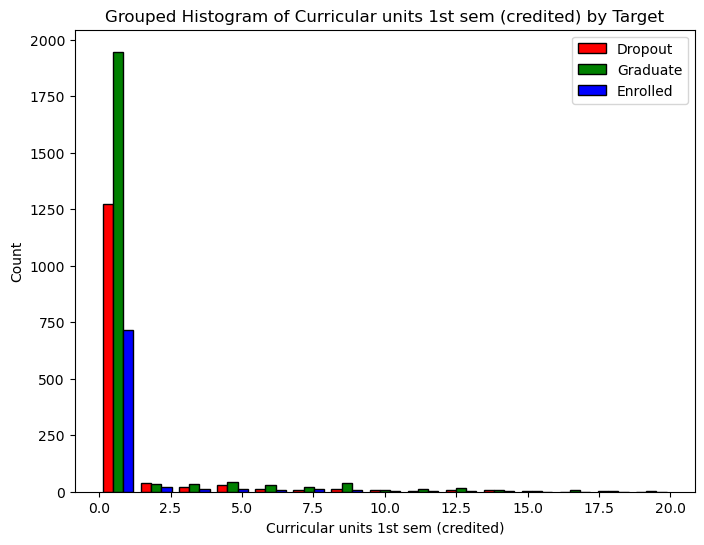

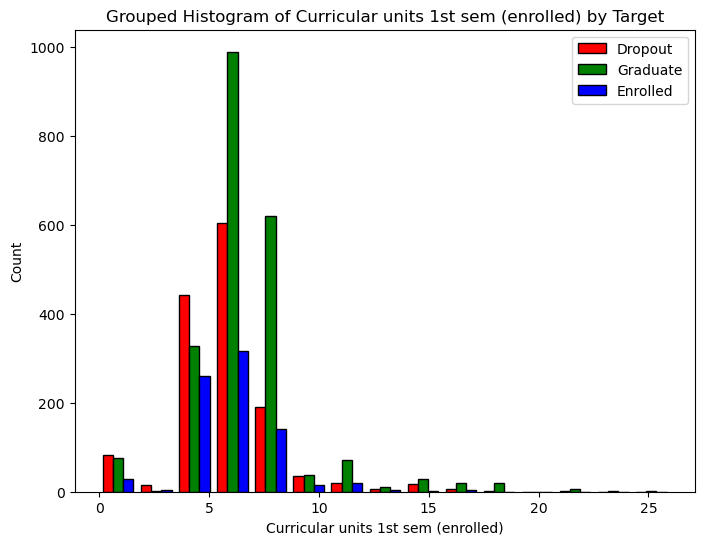

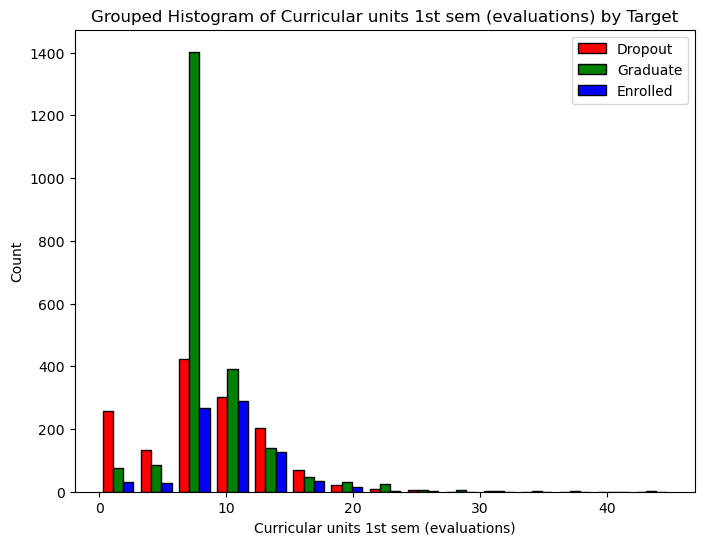

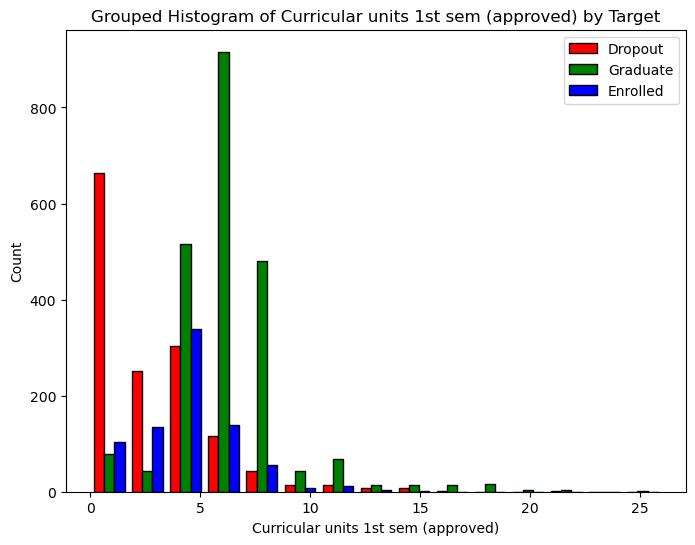

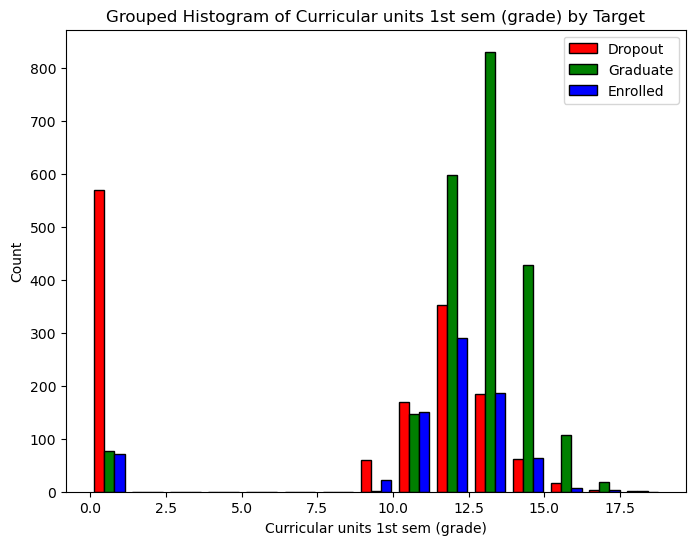

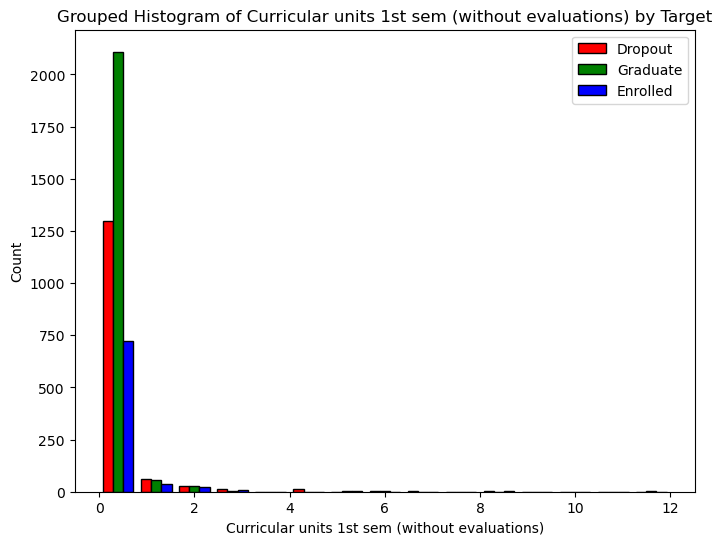

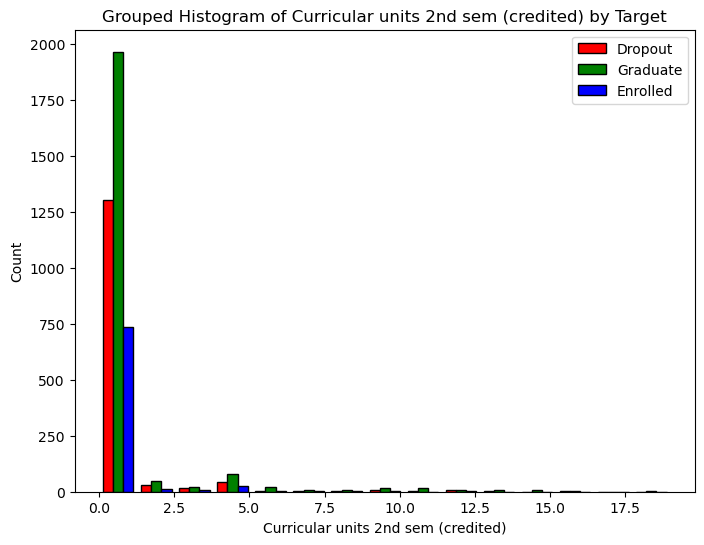

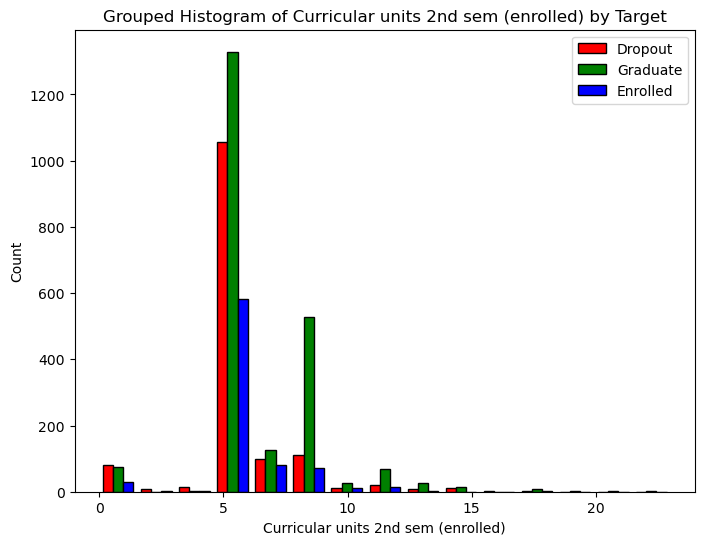

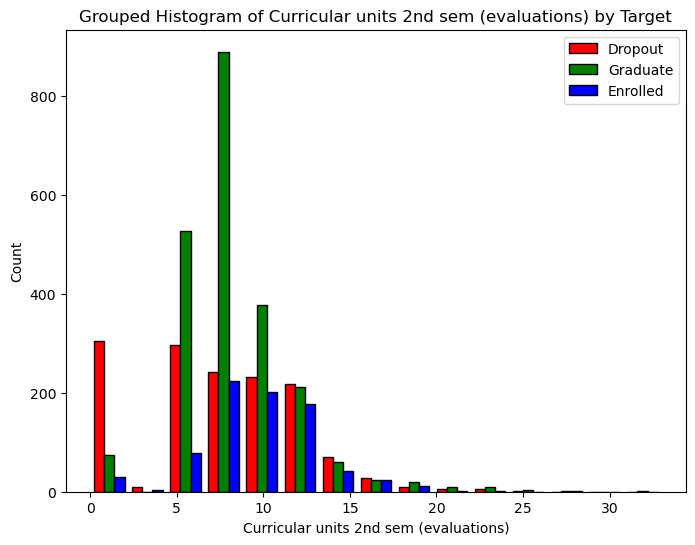

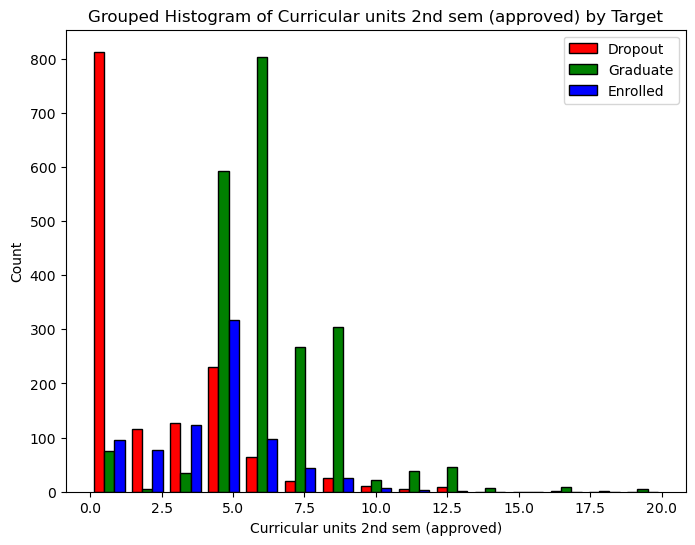

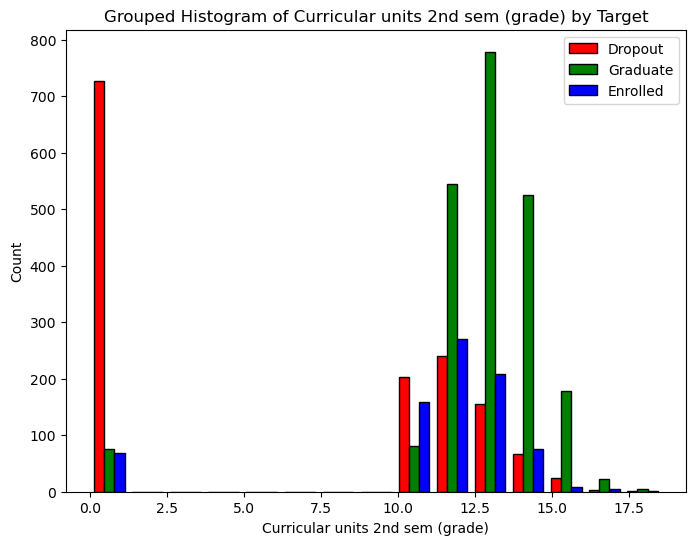

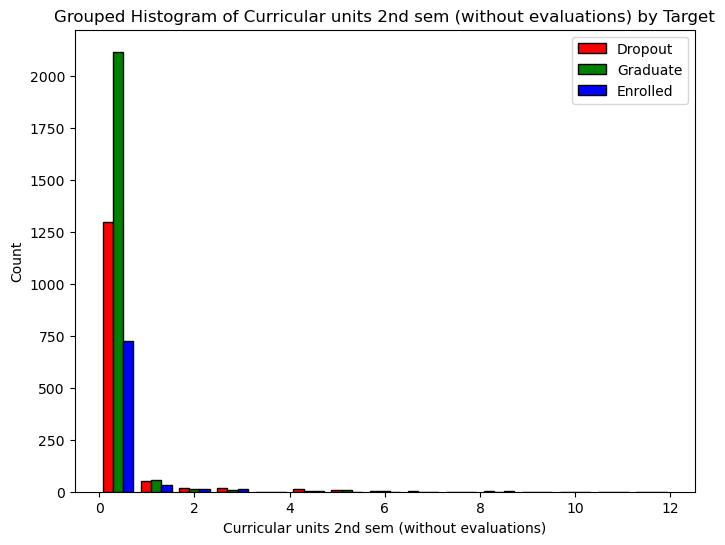

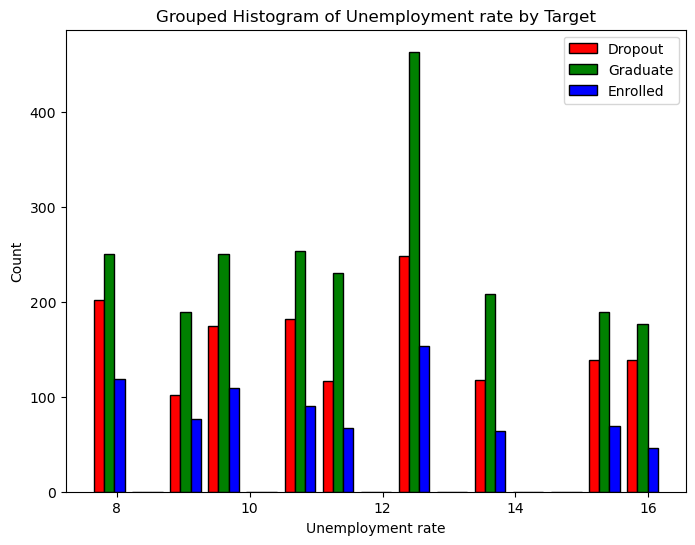

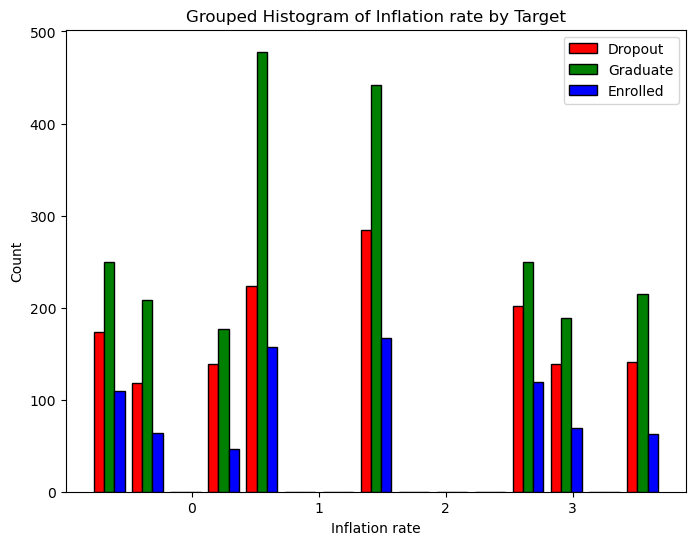

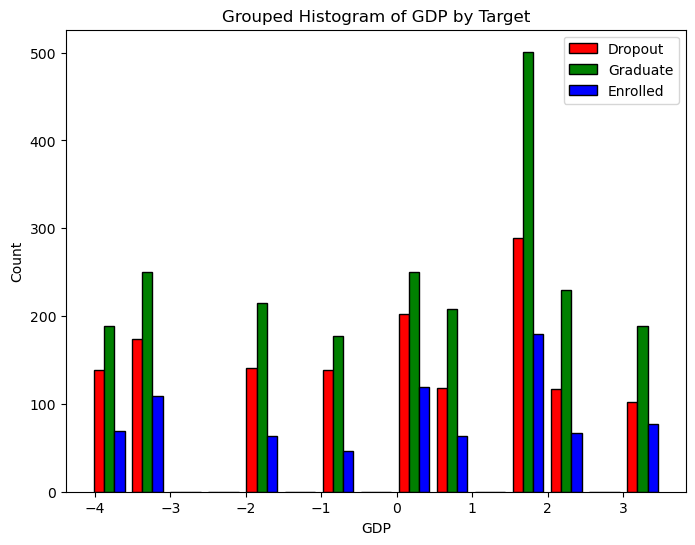

In [20]:
classes = data['Target'].unique()
colors = ['r', 'g', 'b']
color_dict = dict(zip(classes, colors))

for feature in X.columns:
    plt.figure(figsize=(8, 6))
    
    # Create separate data arrays for each class
    data_by_class = [data[data['Target'] == cls][feature] for cls in classes]
    
    # Plot grouped histogram
    plt.hist(data_by_class, 
             bins=15,
             color=[color_dict[cls] for cls in classes],
             label=classes,
             alpha=1.0,  # No transparency
             edgecolor='black')
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Grouped Histogram of {feature} by Target')
    plt.legend()
